In [34]:
from iminuit import Minuit
import matplotlib.pyplot as plt
#import matplotlib; matplotlib.use('Agg')
from matplotlib import transforms
from matplotlib import rc
from IPython.display import Image
import numpy as np
from astropy.io import fits as pyfits
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import scipy
from scipy.optimize import minimize, rosen, rosen_der
from scipy.special import factorial
import scipy.integrate as integrate
from scipy.integrate import quad
from itertools import starmap
from scipy import optimize
import corner
import time
from mpl_toolkits import mplot3d
import healpy as hp
from scipy import nan
import dark_matter_jfactors_test as dmj
import math
import random
import importlib
from pymultinest.solve import solve
import pymultinest
import warnings
warnings.filterwarnings("ignore")
import scipy as sp
import scipy.interpolate
import json
from os import walk
import re
import acceptance_and_angle as aaa
import photon_spectrum
import evaporating_black_hole_template as dm_template

In [37]:
energies_low = [.3, .5, 1, 2, 5, 10]
energies_high = [10.001, 30, 50, 70, 100, 300, 500, 700, 1000, 3000] #in MeV
psf_low = [4.3, 2.5, 1.5, 1.1, 0.8, 0.8] #in degrees
psf_high = [9.5, 5.4, 2.7, 1.8, 1.3, 0.51, 0.3, 0.23, .15, .10]
effective_area_low = list(np.array([560, 446, 297, 117, 105, 50])*0.2*4*np.pi) #in cm^2*str
effective_area_high = list(np.array([215, 846, 1220, 1245, 1310, 1379, 1493, 1552, 1590, 1810])*.2*4*np.pi) #in cm^2*str
                               

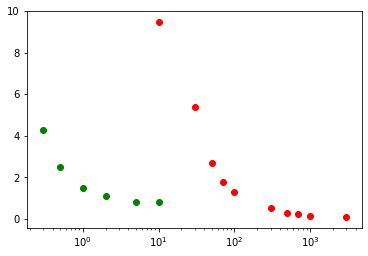

In [6]:
plt.scatter(energies_low, psf_low, color = 'green')
plt.scatter(energies_high, psf_high, color = 'red')
plt.xscale('log')

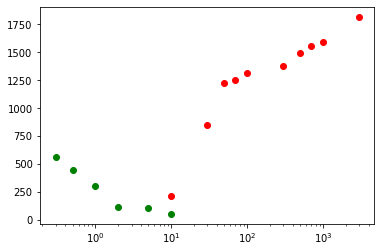

In [7]:
plt.scatter(energies_low, effective_area_low, color = 'green')
plt.scatter(energies_high, effective_area_high, color = 'red')
plt.xscale('log')

In [8]:

def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    logy = np.log10(yy)
    lin_interp = sp.interpolate.interp1d(logx, logy, kind=kind, fill_value = 'extrapolate')
    log_interp = lambda zz: np.power(10.0, lin_interp(np.log10(zz)))
    return log_interp

def get_acceptance_interp():
    
    return log_interp1d(energies_low+energies_high, effective_area_low+effective_area_high) #units of cm^2*str

def get_angle_interp():
    
    return log_interp1d(energies_low+energies_high, psf_low+psf_high) #units of degrees

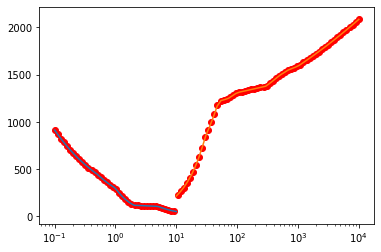

In [20]:
energies = np.logspace(np.log10(1e-1), np.log10(1e1), num = 50)
energies2 = np.logspace(np.log10(1e1), np.log10(1e4), num = 50)
energies3 = np.logspace(np.log10(1e-1), np.log10(1e4), num = 100)
low_area = log_interp1d(energies_low, effective_area_low)
high_area = log_interp1d(energies_high, effective_area_high)
both_area = log_interp1d(energies_low+energies_high, effective_area_low+effective_area_high)
plt.plot(energies, low_area(energies))
plt.plot(energies2, high_area(energies2))
plt.scatter(energies3, both_area(energies3), color = 'red')
plt.xscale('log')

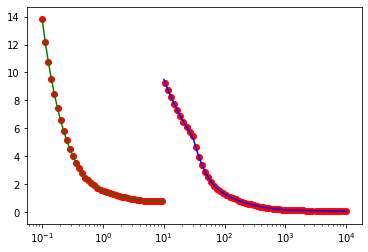

In [27]:
energies = np.logspace(np.log10(1e-1), np.log10(1e1), num = 50)
energies2 = np.logspace(np.log10(1e1), np.log10(1e4), num = 50)
energies3 = np.logspace(np.log10(1e-1), np.log10(1e4), num = 100)
low_area = log_interp1d(energies_low, psf_low)
high_area = log_interp1d(energies_high, psf_high)
both_area = log_interp1d(energies_low+energies_high, psf_low+psf_high)
plt.plot(energies, low_area(energies), color = 'green')
plt.plot(energies2, high_area(energies2), color = 'blue')
plt.scatter(energies3, both_area(energies3), color = 'red')
plt.xscale('log')

In [33]:
print(both_area(2))

1.1
